# Introduction to Pandas

In this section of the course we will learn how to use pandas for data analysis. You can think of pandas as an extremely powerful version of Excel, with a lot more features. In this section of the course, you should go through the notebooks in this order:

* Introduction to Pandas
* Series
* DataFrames
* Missing Data
* Merging,Joining,and Concatenating
* Operations
* Data Input and Output

# Series

The first main data type we will learn about for pandas is the Series data type. Let's import Pandas and explore the Series object.

A Series is very similar to a NumPy array (in fact it is built on top of the NumPy array object). What differentiates the NumPy array from a Series, is that a Series can have axis labels, meaning it can be indexed by a label, instead of just a number location. It also doesn't need to hold numeric data, it can hold any arbitrary Python Object.

Let's explore this concept through some examples:

In [1]:
import numpy as np
import pandas as pd

### Creating a Series

You can convert a list,numpy array, or dictionary to a Series:

In [97]:
labels = ['a','b','c']
my_list = [10,20,30]
arr = np.array([10,20,30])
d = {'a':10,'b':20,'c':30}

** Using Lists**

In [99]:
pd.Series(data=my_list)

0    10
1    20
2    30
dtype: int64

In [100]:
pd.Series(data=my_list,index=labels)

a    10
b    20
c    30
dtype: int64

In [105]:
pd.Series(my_list,labels)

a    10
b    20
c    30
dtype: int64

** NumPy Arrays **

In [106]:
pd.Series(arr)

0    10
1    20
2    30
dtype: int32

In [107]:
pd.Series(arr,labels)

a    10
b    20
c    30
dtype: int32

** Dictionary**

In [108]:
pd.Series(d)

a    10
b    20
c    30
dtype: int64

### Data in a Series

A pandas Series can hold a variety of object types:

In [109]:
pd.Series(data=labels)

0    a
1    b
2    c
dtype: object

In [110]:
# Even functions (although unlikely that you will use this)
pd.Series([sum,print,len])

0      <built-in function sum>
1    <built-in function print>
2      <built-in function len>
dtype: object

## Using an Index

The key to using a Series is understanding its index. Pandas makes use of these index names or numbers by allowing for fast look ups of information (works like a hash table or dictionary).

Let's see some examples of how to grab information from a Series. Let us create two sereis, ser1 and ser2:

In [113]:
ser1 = pd.Series([1,2,3,4],index = ['USA', 'Germany','USSR', 'Japan'])                                   

In [114]:
ser1

USA        1
Germany    2
USSR       3
Japan      4
dtype: int64

In [115]:
ser2 = pd.Series([1,2,5,4],index = ['USA', 'Germany','Italy', 'Japan'])                                   

In [116]:
ser2

USA        1
Germany    2
Italy      5
Japan      4
dtype: int64

In [117]:
ser1['USA']

1

Operations are then also done based off of index:

In [118]:
ser1 + ser2

Germany    4.0
Italy      NaN
Japan      8.0
USA        2.0
USSR       NaN
dtype: float64

# DataFrames

DataFrames are the workhorse of pandas and are directly inspired by the R programming language. We can think of a DataFrame as a bunch of Series objects put together to share the same index. Let's use pandas to explore this topic!

In [119]:
import pandas as pd
import numpy as np

In [120]:
from numpy.random import randn
np.random.seed(101)

In [125]:
#randn(5,4)
['A','B','C','D','E']

In [128]:
df = pd.DataFrame(randn(5,4),index=['A','B','C','D','E'],columns='W X Y Z'.split())

In [129]:
df

,W,X,Y,Z
A,-1.467514,-0.494095,-0.162535,0.485809
B,0.392489,0.221491,-0.855196,1.541990
C,0.666319,-0.538235,-0.568581,1.407338
D,0.641806,-0.905100,-0.391157,1.028293
E,-1.972605,-0.866885,0.720788,-1.223082


## Selection and Indexing

Let's learn the various methods to grab data from a DataFrame

In [137]:
df['Y']

A   -0.162535
B   -0.855196
C   -0.568581
D   -0.391157
E    0.720788
Name: Y, dtype: float64

In [140]:
# Pass a list of column names
df[['W','X']]

,W,X
A,-1.467514,-0.494095
B,0.392489,0.221491
C,0.666319,-0.538235
D,0.641806,-0.905100
E,-1.972605,-0.866885


In [141]:
# SQL Syntax (NOT RECOMMENDED!)
df.W

A   -1.467514
B    0.392489
C    0.666319
D    0.641806
E   -1.972605
Name: W, dtype: float64

DataFrame Columns are just Series

In [142]:
type(df['W'])

pandas.core.series.Series

**Creating a new column:**

In [146]:
df['i'] = df['W'] * df['Y']

In [148]:
df

,W,X,Y,Z,new,i
A,-1.467514,-0.494095,-0.162535,0.485809,0.238522,0.238522
B,0.392489,0.221491,-0.855196,1.541990,-0.335655,-0.335655
C,0.666319,-0.538235,-0.568581,1.407338,-0.378857,-0.378857
D,0.641806,-0.905100,-0.391157,1.028293,-0.251046,-0.251046
E,-1.972605,-0.866885,0.720788,-1.223082,-1.421829,-1.421829


** Removing Columns**

In [152]:
df.drop('new',axis=1)

,W,X,Y,Z,i
A,-1.467514,-0.494095,-0.162535,0.485809,0.238522
B,0.392489,0.221491,-0.855196,1.541990,-0.335655
C,0.666319,-0.538235,-0.568581,1.407338,-0.378857
D,0.641806,-0.905100,-0.391157,1.028293,-0.251046
E,-1.972605,-0.866885,0.720788,-1.223082,-1.421829


In [153]:
# Not inplace unless specified!
df

,W,X,Y,Z,new,i
A,-1.467514,-0.494095,-0.162535,0.485809,0.238522,0.238522
B,0.392489,0.221491,-0.855196,1.541990,-0.335655,-0.335655
C,0.666319,-0.538235,-0.568581,1.407338,-0.378857,-0.378857
D,0.641806,-0.905100,-0.391157,1.028293,-0.251046,-0.251046
E,-1.972605,-0.866885,0.720788,-1.223082,-1.421829,-1.421829


In [154]:
df.drop('new',axis=1,inplace=True)

In [155]:
df

,W,X,Y,Z,i
A,-1.467514,-0.494095,-0.162535,0.485809,0.238522
B,0.392489,0.221491,-0.855196,1.541990,-0.335655
C,0.666319,-0.538235,-0.568581,1.407338,-0.378857
D,0.641806,-0.905100,-0.391157,1.028293,-0.251046
E,-1.972605,-0.866885,0.720788,-1.223082,-1.421829


Can also drop rows this way:

In [156]:
df.drop('E',axis=0)

,W,X,Y,Z,i
A,-1.467514,-0.494095,-0.162535,0.485809,0.238522
B,0.392489,0.221491,-0.855196,1.541990,-0.335655
C,0.666319,-0.538235,-0.568581,1.407338,-0.378857
D,0.641806,-0.905100,-0.391157,1.028293,-0.251046


** Selecting Rows**

In [157]:
df.loc['A']

W   -1.467514
X   -0.494095
Y   -0.162535
Z    0.485809
i    0.238522
Name: A, dtype: float64

Or select based off of position instead of label 

In [158]:
df.iloc[2]

W    0.666319
X   -0.538235
Y   -0.568581
Z    1.407338
i   -0.378857
Name: C, dtype: float64

** Selecting subset of rows and columns **

In [159]:
df.loc['B','Y']

-0.8551960407780934

In [160]:
df.loc[['A','B'],['W','Y']]

,W,Y
A,-1.467514,-0.162535
B,0.392489,-0.855196


### Conditional Selection

An important feature of pandas is conditional selection using bracket notation, very similar to numpy:

In [161]:
df

,W,X,Y,Z,i
A,-1.467514,-0.494095,-0.162535,0.485809,0.238522
B,0.392489,0.221491,-0.855196,1.541990,-0.335655
C,0.666319,-0.538235,-0.568581,1.407338,-0.378857
D,0.641806,-0.905100,-0.391157,1.028293,-0.251046
E,-1.972605,-0.866885,0.720788,-1.223082,-1.421829


In [164]:
df>0

,W,X,Y,Z,i
A,False,False,False,True,True
B,True,True,False,True,False
C,True,False,False,True,False
D,True,False,False,True,False
E,False,False,True,False,False


In [165]:
df[df>0]

,W,X,Y,Z,i
A,NaN,NaN,NaN,0.485809,0.238522
B,0.392489,0.221491,NaN,1.541990,NaN
C,0.666319,NaN,NaN,1.407338,NaN
D,0.641806,NaN,NaN,1.028293,NaN
E,NaN,NaN,0.720788,NaN,NaN


In [166]:
df[df['W']>0]

,W,X,Y,Z,i
B,0.392489,0.221491,-0.855196,1.541990,-0.335655
C,0.666319,-0.538235,-0.568581,1.407338,-0.378857
D,0.641806,-0.905100,-0.391157,1.028293,-0.251046


In [167]:
df[df['W']>0]['Y']

B   -0.855196
C   -0.568581
D   -0.391157
Name: Y, dtype: float64

In [168]:
df[df['W']>0][['Y','X']]

,Y,X
B,-0.855196,0.221491
C,-0.568581,-0.538235
D,-0.391157,-0.905100


For two conditions you can use | and & with parenthesis:

In [169]:
df[(df['W']>0) & (df['Y'] > 1)]

,W,X,Y,Z,i


## More Index Details

Let's discuss some more features of indexing, including resetting the index or setting it something else. We'll also talk about index hierarchy!

In [170]:
df

,W,X,Y,Z,i
A,-1.467514,-0.494095,-0.162535,0.485809,0.238522
B,0.392489,0.221491,-0.855196,1.541990,-0.335655
C,0.666319,-0.538235,-0.568581,1.407338,-0.378857
D,0.641806,-0.905100,-0.391157,1.028293,-0.251046
E,-1.972605,-0.866885,0.720788,-1.223082,-1.421829


In [171]:
# Reset to default 0,1...n index
df.reset_index()

,index,W,X,Y,Z,i
0,A,-1.467514,-0.494095,-0.162535,0.485809,0.238522
1,B,0.392489,0.221491,-0.855196,1.541990,-0.335655
2,C,0.666319,-0.538235,-0.568581,1.407338,-0.378857
3,D,0.641806,-0.905100,-0.391157,1.028293,-0.251046
4,E,-1.972605,-0.866885,0.720788,-1.223082,-1.421829


In [172]:
newind = 'CA NY WY OR CO'.split()

In [173]:
df['States'] = newind

In [174]:
df

,W,X,Y,Z,i,States
A,-1.467514,-0.494095,-0.162535,0.485809,0.238522,CA
B,0.392489,0.221491,-0.855196,1.541990,-0.335655,NY
C,0.666319,-0.538235,-0.568581,1.407338,-0.378857,WY
D,0.641806,-0.905100,-0.391157,1.028293,-0.251046,OR
E,-1.972605,-0.866885,0.720788,-1.223082,-1.421829,CO


In [177]:
df.set_index('States')

,W,X,Y,Z,i
States,,,,,
CA,-1.467514,-0.494095,-0.162535,0.485809,0.238522
NY,0.392489,0.221491,-0.855196,1.541990,-0.335655
WY,0.666319,-0.538235,-0.568581,1.407338,-0.378857
OR,0.641806,-0.905100,-0.391157,1.028293,-0.251046
CO,-1.972605,-0.866885,0.720788,-1.223082,-1.421829


In [178]:
df

,W,X,Y,Z,i,States
A,-1.467514,-0.494095,-0.162535,0.485809,0.238522,CA
B,0.392489,0.221491,-0.855196,1.541990,-0.335655,NY
C,0.666319,-0.538235,-0.568581,1.407338,-0.378857,WY
D,0.641806,-0.905100,-0.391157,1.028293,-0.251046,OR
E,-1.972605,-0.866885,0.720788,-1.223082,-1.421829,CO


In [179]:
df.set_index('States',inplace=True)

In [180]:
df

,W,X,Y,Z,i
States,,,,,
CA,-1.467514,-0.494095,-0.162535,0.485809,0.238522
NY,0.392489,0.221491,-0.855196,1.541990,-0.335655
WY,0.666319,-0.538235,-0.568581,1.407338,-0.378857
OR,0.641806,-0.905100,-0.391157,1.028293,-0.251046
CO,-1.972605,-0.866885,0.720788,-1.223082,-1.421829


# Missing Data

Let's show a few convenient methods to deal with Missing Data in pandas:

In [181]:
import numpy as np
import pandas as pd

In [182]:
df = pd.DataFrame({'A':[1,2,np.nan],
                  'B':[5,np.nan,np.nan],
                  'C':[1,2,3]})

In [183]:
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [187]:
df.dropna()

,A,B,C
0,1.0,5.0,1


In [188]:
df.dropna(axis=1)

,C
0,1
1,2
2,3


In [191]:
df.dropna(thresh=2)

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


In [193]:
df.fillna(value=45)

,A,B,C
0,1.0,5.0,1
1,2.0,45.0,2
2,45.0,45.0,3


In [195]:
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [199]:
df['A'].fillna(df['A'].mean())

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

In [202]:
df['A'].fillna(value=df['A'].mean())

KeyError: 'A'

# Operations

There are lots of operations with pandas that will be really useful to you, but don't fall into any distinct category. Let's show them here in this lecture:

In [203]:
import pandas as pd
df = pd.DataFrame({'col1':[1,2,3,4],'col2':[444,555,666,444],'col3':['abc','def','ghi','xyz']})
df.head()

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


### Info on Unique Values

In [204]:
df['col2'].unique()

array([444, 555, 666], dtype=int64)

In [205]:
df['col1'].nunique()

4

In [206]:
df['col2'].value_counts()

444    2
555    1
666    1
Name: col2, dtype: int64

### Selecting Data

In [207]:
#Select from DataFrame using criteria from multiple columns
newdf = df[(df['col1']>2) & (df['col2']==444)]

In [208]:
newdf

,col1,col2,col3
3,4,444,xyz


### Applying Functions

In [209]:
def times2(x):
    return x*2

In [210]:
df['col1'].apply(times2)

0    2
1    4
2    6
3    8
Name: col1, dtype: int64

In [211]:
df['col3'].apply(len)

0    3
1    3
2    3
3    3
Name: col3, dtype: int64

In [212]:
df['col1'].sum()

10

** Permanently Removing a Column**

In [213]:
del df['col1']

In [214]:
df

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


** Get column and index names: **

In [215]:
df.columns

Index(['col2', 'col3'], dtype='object')

In [216]:
df.index

RangeIndex(start=0, stop=4, step=1)

** Sorting and Ordering a DataFrame:**

In [217]:
df

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


In [218]:
df.sort_values(by='col2') #inplace=False by default

,col2,col3
0,444,abc
3,444,xyz
1,555,def
2,666,ghi


** Find Null Values or Check for Null Values**

In [222]:
df.isnull()

,col2,col3
0,False,False
1,False,False
2,False,False
3,False,False


In [223]:
# Drop rows with NaN Values
df.dropna()

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


** Filling in NaN values with something else: **

In [221]:
import numpy as np

In [224]:
df = pd.DataFrame({'col1':[1,2,3,np.nan],
                   'col2':[np.nan,555,666,444],
                   'col3':['abc','def','ghi','xyz']})
df.head()

,col1,col2,col3
0,1.0,NaN,abc
1,2.0,555.0,def
2,3.0,666.0,ghi
3,NaN,444.0,xyz


In [225]:
df.fillna('FILL')

,col1,col2,col3
0,1,FILL,abc
1,2,555,def
2,3,666,ghi
3,FILL,444,xyz


# Data Input and Output

This notebook is the reference code for getting input and output, pandas can read a variety of file types using its pd.read_ methods. Let's take a look at the most common data types:

In [110]:
import numpy as np
import pandas as pd

## CSV

### CSV Input

In [227]:
df = pd.read_excel(r'C:/Users/Saad/Desktop/Marvin_2.xlsx')

In [229]:
df.isnull()

,X,Y,Z,Gold,Cu
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


### CSV Output

In [112]:
df.to_csv('example',index=False)

## Excel
Pandas can read and write excel files, keep in mind, this only imports data. Not formulas or images, having images or macros may cause this read_excel method to crash. 

### Excel Input

In [113]:
pd.read_excel('Excel_Sample.xlsx',sheetname='Sheet1')

C:\Users\Saad\Anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


FileNotFoundError: [Errno 2] No such file or directory: 'Excel_Sample.xlsx'

### Excel Output

In [116]:
df.to_excel('Excel_Sample.xlsx',sheet_name='Sheet1')

# Matplotlib Overview Lecture

## Introduction

Matplotlib is the "grandfather" library of data visualization with Python. It was created by John Hunter. He created it to try to replicate MatLab's (another programming language) plotting capabilities in Python. So if you happen to be familiar with matlab, matplotlib will feel natural to you.

It is an excellent 2D and 3D graphics library for generating scientific figures. 

Some of the major Pros of Matplotlib are:

* Generally easy to get started for simple plots
* Support for custom labels and texts
* Great control of every element in a figure
* High-quality output in many formats
* Very customizable in general

Matplotlib allows you to create reproducible figures programmatically. Let's learn how to use it! Before continuing this lecture, I encourage you just to explore the official Matplotlib web page: http://matplotlib.org/

## Installation 

You'll need to install matplotlib first with either:

    conda install matplotlib
or
    pip install matplotlib
    
## Importing

Import the `matplotlib.pyplot` module under the name `plt` (the tidy way):

In [230]:
import matplotlib.pyplot as plt

You'll also need to use this line to see plots in the notebook:

In [231]:
%matplotlib inline

That line is only for jupyter notebooks, if you are using another editor, you'll use: **plt.show()** at the end of all your plotting commands to have the figure pop up in another window.

# Basic Example

Let's walk through a very simple example using two numpy arrays:

### Example

Let's walk through a very simple example using two numpy arrays. You can also use lists, but most likely you'll be passing numpy arrays or pandas columns (which essentially also behave like arrays).

** The data we want to plot:**

In [232]:
import numpy as np
x = np.linspace(0, 5, 11)
y = x ** 2

In [233]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [234]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

## Basic Matplotlib Commands

We can create a very simple line plot using the following ( I encourage you to pause and use Shift+Tab along the way to check out the document strings for the functions we are using).

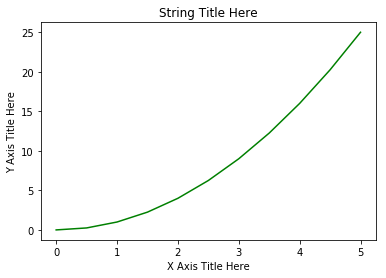

In [238]:
plt.plot(x, y, 'g') # 'r' is the color red
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here')
plt.show()

## Creating Multiplots on Same Canvas

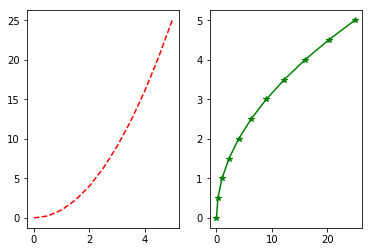

In [240]:
# plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,2,1)
plt.plot(x, y, 'r--') # More on color options later
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-');

___
# Matplotlib Object Oriented Method
Now that we've seen the basics, let's break it all down with a more formal introduction of Matplotlib's Object Oriented API. This means we will instantiate figure objects and then call methods or attributes from that object.

## Introduction to the Object Oriented Method

The main idea in using the more formal Object Oriented method is to create figure objects and then just call methods or attributes off of that object. This approach is nicer when dealing with a canvas that has multiple plots on it. 

To begin we create a figure instance. Then we can add axes to that figure:

Text(0.5, 1.0, 'Set Title')

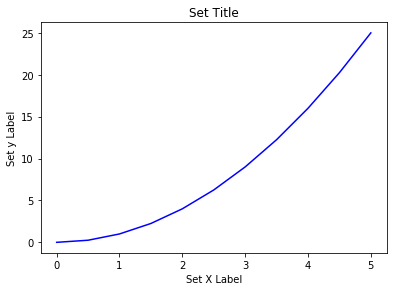

In [241]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(x, y, 'b')
axes.set_xlabel('Set X Label') # Notice the use of set_ to begin methods
axes.set_ylabel('Set y Label')
axes.set_title('Set Title')

Code is a little more complicated, but the advantage is that we now have full control of where the plot axes are placed, and we can easily add more than one axis to the figure:

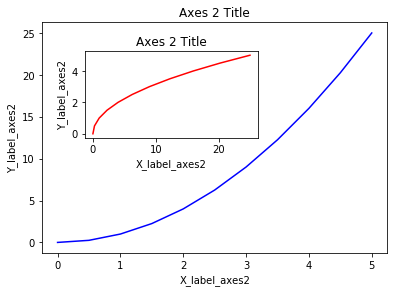

In [242]:
# Creates blank canvas
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# Larger Figure Axes 1
axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes2')
axes1.set_ylabel('Y_label_axes2')
axes1.set_title('Axes 2 Title')

# Insert Figure Axes 2
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title');

## subplots()

The plt.subplots() object will act as a more automatic axis manager.

Basic use cases:

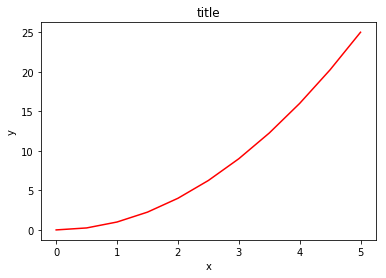

In [243]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots()

# Now use the axes object to add stuff to plot
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

Then you can specify the number of rows and columns when creating the subplots() object:

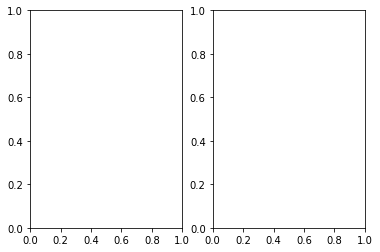

In [244]:
# Empty canvas of 1 by 2 subplots
fig, axes = plt.subplots(nrows=1, ncols=2)

In [245]:
# Axes is an array of axes to plot on
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000203FEF5A0F0>,
      dtype=object)

We can iterate through this array:

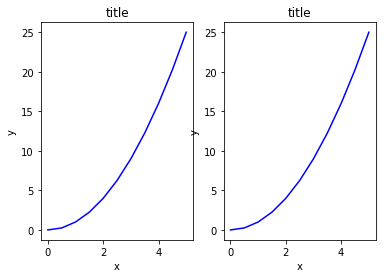

In [246]:
for ax in axes:
    ax.plot(x, y, 'b')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

# Display the figure object    
fig

A common issue with matplolib is overlapping subplots or figures. We ca use **fig.tight_layout()** or **plt.tight_layout()** method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content:

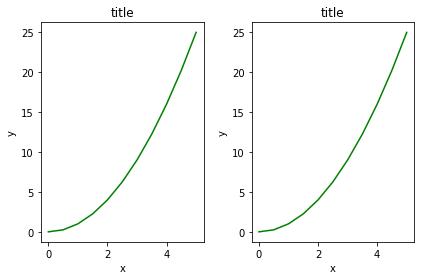

In [247]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'g')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

fig    
plt.tight_layout()

### Figure size, aspect ratio and DPI

Matplotlib allows the aspect ratio, DPI and figure size to be specified when the Figure object is created. You can use the `figsize` and `dpi` keyword arguments. 
* `figsize` is a tuple of the width and height of the figure in inches
* `dpi` is the dots-per-inch (pixel per inch). 

For example:

In [248]:
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

The same arguments can also be passed to layout managers, such as the `subplots` function:

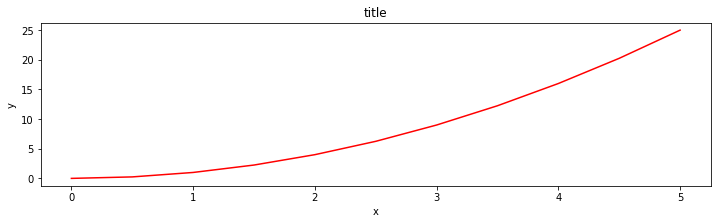

In [249]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

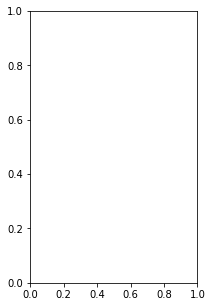

In [252]:
fig, axes = plt.subplots(figsize=(3,5))

(<Figure size 864x216 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x203ecc19828>)

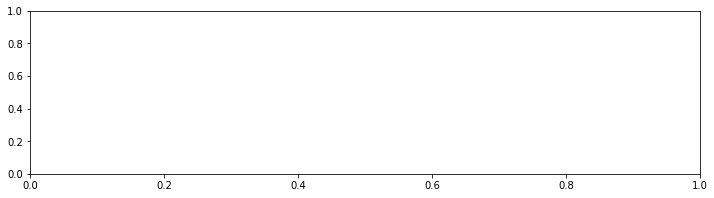

In [13]:
plt.subplots(figsize=(12,3))

## Saving figures
Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF. 

To save a figure to a file we can use the `savefig` method in the `Figure` class:

In [134]:
fig.savefig("filename.png")

Here we can also optionally specify the DPI and choose between different output formats:

In [253]:
fig.savefig("filename.png", dpi=200)

____
## Legends, labels and titles

Now that we have covered the basics of how to create a figure canvas and add axes instances to the canvas, let's look at how decorate a figure with titles, axis labels, and legends.

**Figure titles**

A title can be added to each axis instance in a figure. To set the title, use the `set_title` method in the axes instance:

In [254]:
ax.set_title("title");

**Axis labels**

Similarly, with the methods `set_xlabel` and `set_ylabel`, we can set the labels of the X and Y axes:

In [255]:
ax.set_xlabel("x")
ax.set_ylabel("y");

### Legends

You can use the **label="label text"** keyword argument when plots or other objects are added to the figure, and then using the **legend** method without arguments to add the legend to the figure: 

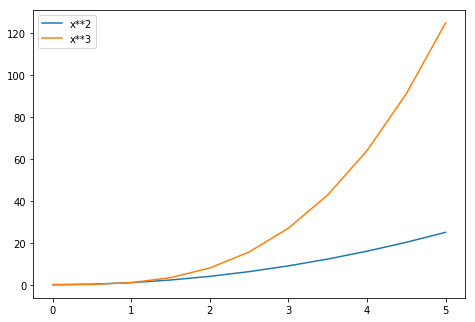

In [256]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(x, x**2, label="x**2")
ax.plot(x, x**3, label="x**3")
ax.legend()

Notice how are legend overlaps some of the actual plot!

The **legend** function takes an optional keyword argument **loc** that can be used to specify where in the figure the legend is to be drawn. The allowed values of **loc** are numerical codes for the various places the legend can be drawn. See the [documentation page](http://matplotlib.org/users/legend_guide.html#legend-location) for details. Some of the most common **loc** values are:

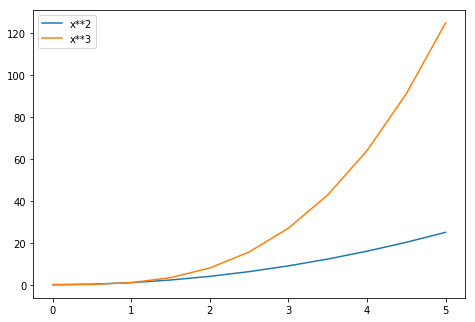

In [257]:
# Lots of options....

ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner

# .. many more options are available

# Most common to choose
ax.legend(loc=0) # let matplotlib decide the optimal location
fig

### Colors with the color= parameter

We can also define colors by their names or RGB hex codes and optionally provide an alpha value using the `color` and `alpha` keyword arguments. Alpha indicates opacity.

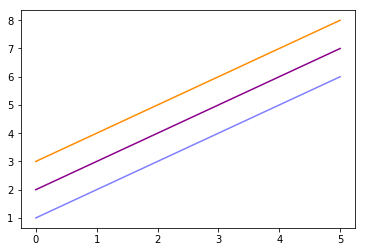

In [258]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="blue", alpha=0.5) # half-transparant
ax.plot(x, x+2, color="#8B008B")        # RGB hex code
ax.plot(x, x+3, color="#FF8C00")        # RGB hex code 

### Line and marker styles

To change the line width, we can use the `linewidth` or `lw` keyword argument. The line style can be selected using the `linestyle` or `ls` keyword arguments:

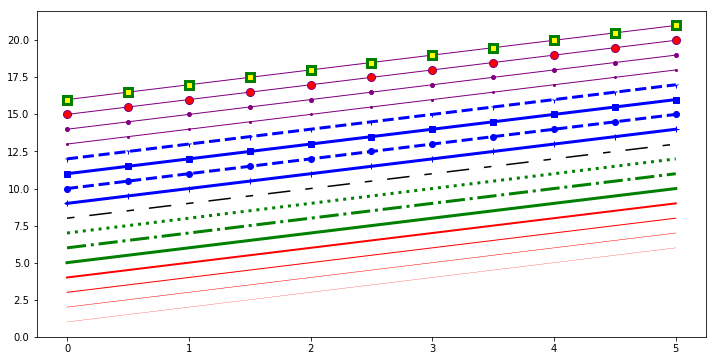

In [262]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="red", linewidth=0.25)
ax.plot(x, x+2, color="red", linewidth=0.50)
ax.plot(x, x+3, color="red", linewidth=1.00)
ax.plot(x, x+4, color="red", linewidth=2.00)

# possible linestype options ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+10, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+11, color="blue", lw=3, ls='-', marker='s')
ax.plot(x, x+12, color="blue", lw=3, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");

### Control over axis appearance

In this section we will look at controlling axis sizing properties in a matplotlib figure.

## Plot range

We can configure the ranges of the axes using the `set_ylim` and `set_xlim` methods in the axis object, or `axis('tight')` for automatically getting "tightly fitted" axes ranges:

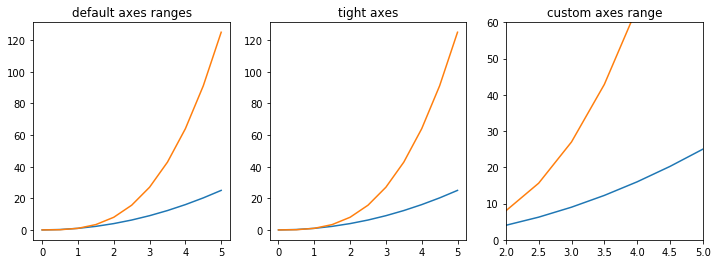

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

___
## Imports

In [263]:
import seaborn as sns
%matplotlib inline

## Data
Seaborn comes with built-in data sets!

In [267]:
tips = sns.load_dataset('tips')

In [268]:
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


## distplot

The distplot shows the distribution of a univariate set of observations.

A data distribution is a function or a listing which shows all the possible values (or intervals) of the data. It also (and this is important) tells you how often each value occurs.

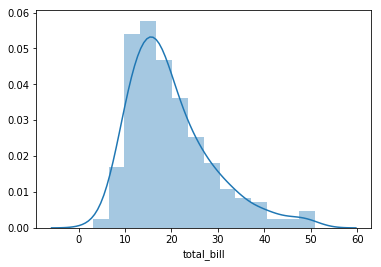

In [270]:
sns.distplot(tips['total_bill'])
# Safe to ignore warnings

To remove the kde layer and just have the histogram use:

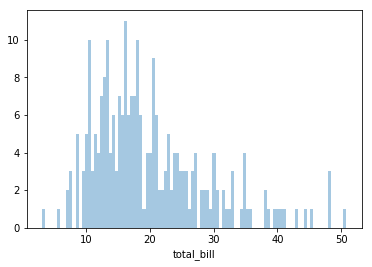

In [273]:
sns.distplot(tips['total_bill'],kde=False,bins=100)

## jointplot

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “hex”

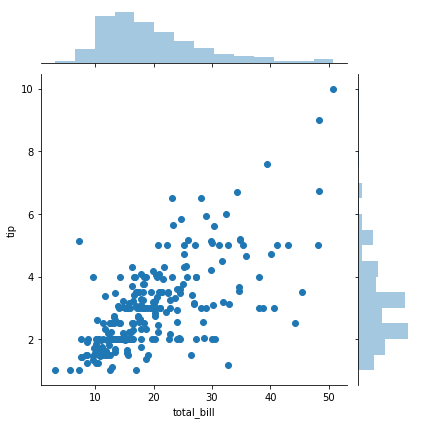

In [275]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

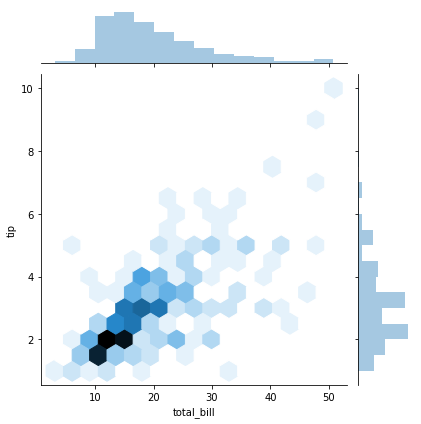

In [276]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

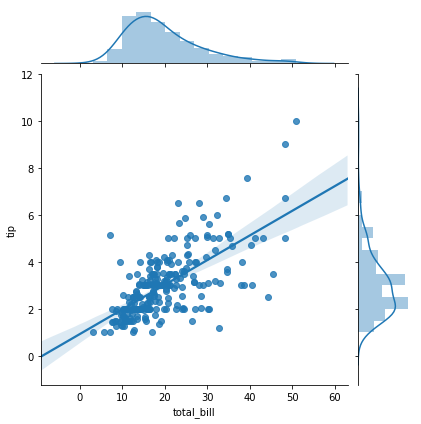

In [277]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

## pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

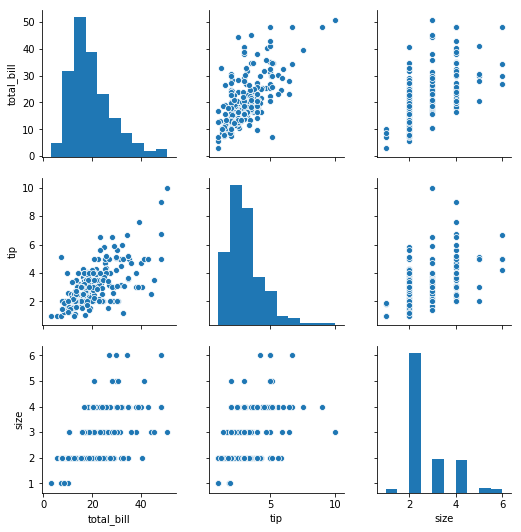

In [155]:
sns.pairplot(tips)

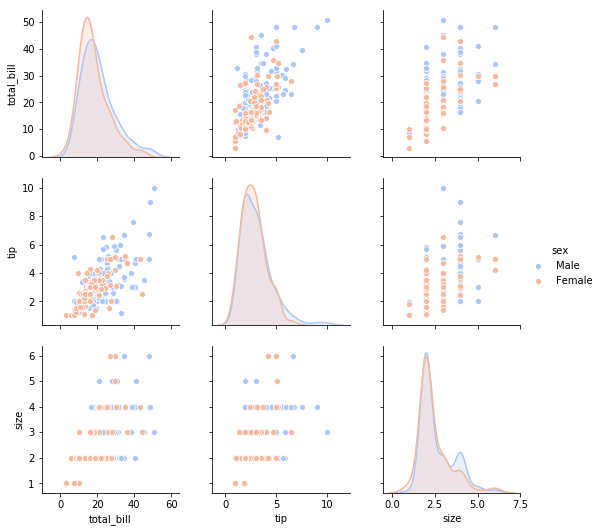

In [157]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

# Categorical Data Plots

Now let's discuss using seaborn to plot categorical data! There are a few main plot types for this:


* boxplot
* barplot
* countplot

Let's go through examples of each!

The Tips dataset is a data frame with 244 rows and 7 variables which represents some tipping data where one waiter recorded information about each tip he received over a period of a few months working in one restaurant. In all the waiter recorded 244 tips.
The tip in dollars, the bill in dollars, the sex of the bill payer, whether there were smokers in the party, the day of the week, the time of day and the size of the party.

In [278]:
import seaborn as sns
%matplotlib inline

In [279]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## barplot and countplot

These very similar plots allow you to get aggregate data off a categorical feature in your data. **barplot** is a general plot that allows you to aggregate the categorical data based off some function, by default the mean:

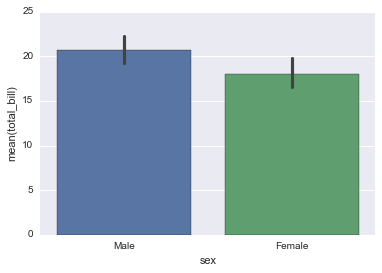

In [8]:
sns.barplot(x='sex',y='total_bill',data=tips)

In [10]:
import numpy as np

In statistics, the standard deviation is a measure of the amount of variation or dispersion of a set of values. A low standard deviation indicates that the values tend to be close to the mean of the set, while a high standard deviation indicates that the values are spread out over a wider range.

You can change the estimator object to your own function, that converts a vector to a scalar:

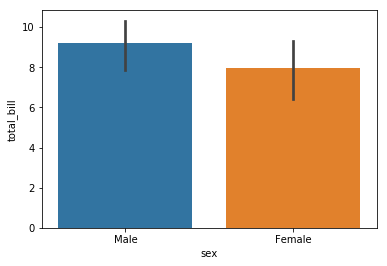

In [280]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

### countplot

This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value:

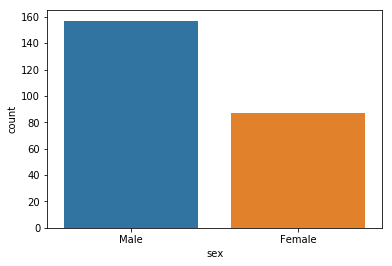

In [281]:
sns.countplot(x='sex',data=tips)

## boxplot

boxplots are used to show the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

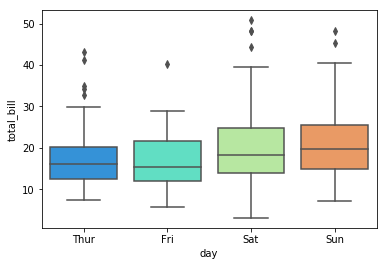

In [282]:
sns.boxplot(x="day", y="total_bill", data=tips,palette='rainbow')

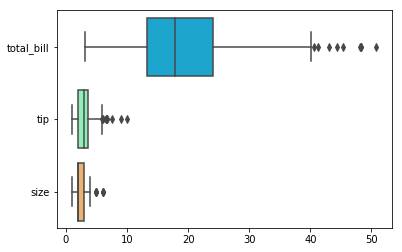

In [284]:
# Can do entire dataframe with orient='h'
sns.boxplot(data=tips,palette='rainbow',orient='h')

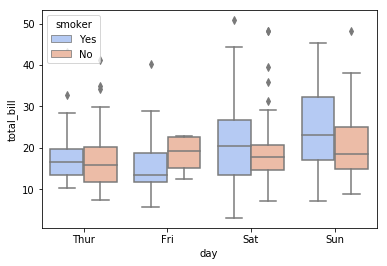

In [285]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm")

## Heatmap

In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you. For example:

In [286]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [287]:
# Matrix form for correlation data
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


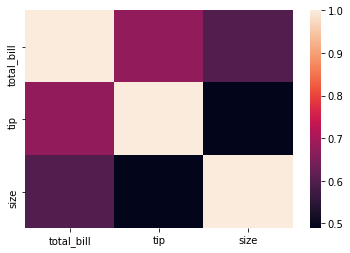

In [288]:
sns.heatmap(tips.corr())

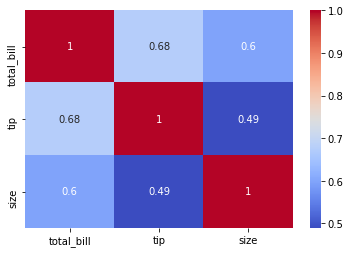

In [289]:
sns.heatmap(tips.corr(),cmap='coolwarm',annot=True)

# Regression Plots

Seaborn has many built-in capabilities for regression plots, however we won't really discuss regression until the machine learning section of the course, so we will only cover the **lmplot()** function for now.

**lmplot** allows you to display linear models, but it also conveniently allows you to split up those plots based off of features, as well as coloring the hue based off of features.

Let's explore how this works:

In [290]:
import seaborn as sns
%matplotlib inline

In [291]:
tips = sns.load_dataset('tips')

In [292]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## lmplot()

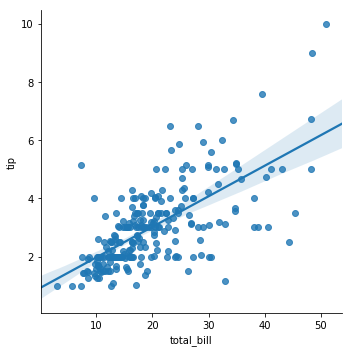

In [293]:
sns.lmplot(x='total_bill',y='tip',data=tips)

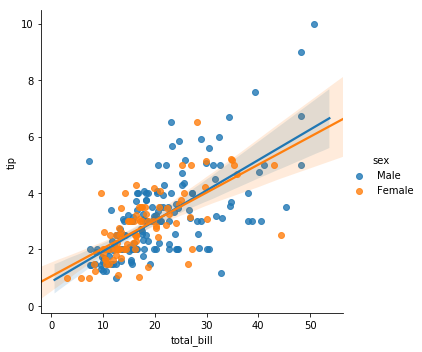

In [294]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex')

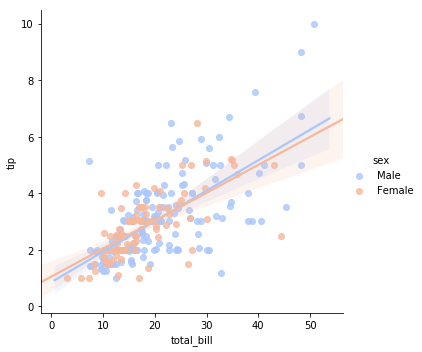

In [295]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm')

### Working with Markers

lmplot kwargs get passed through to **regplot** which is a more general form of lmplot(). regplot has a scatter_kws parameter that gets passed to plt.scatter. So you want to set the s parameter in that dictionary, which corresponds (a bit confusingly) to the squared markersize. In other words you end up passing a dictionary with the base matplotlib arguments, in this case, s for size of a scatter plot. In general, you probably won't remember this off the top of your head, but instead reference the documentation.

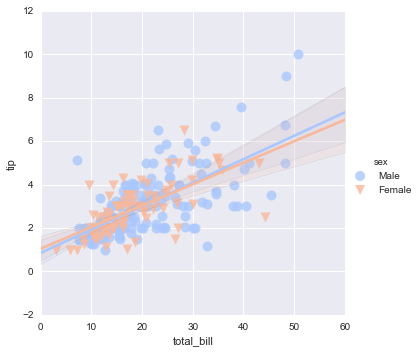

In [16]:
# http://matplotlib.org/api/markers_api.html
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm',
           markers=['o','v'],scatter_kws={'s':100})

## Using a Grid

We can add more variable separation through columns and rows with the use of a grid. Just indicate this with the col or row arguments:

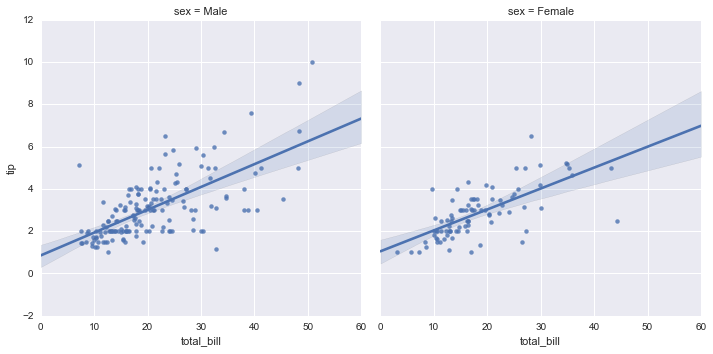

In [28]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex')

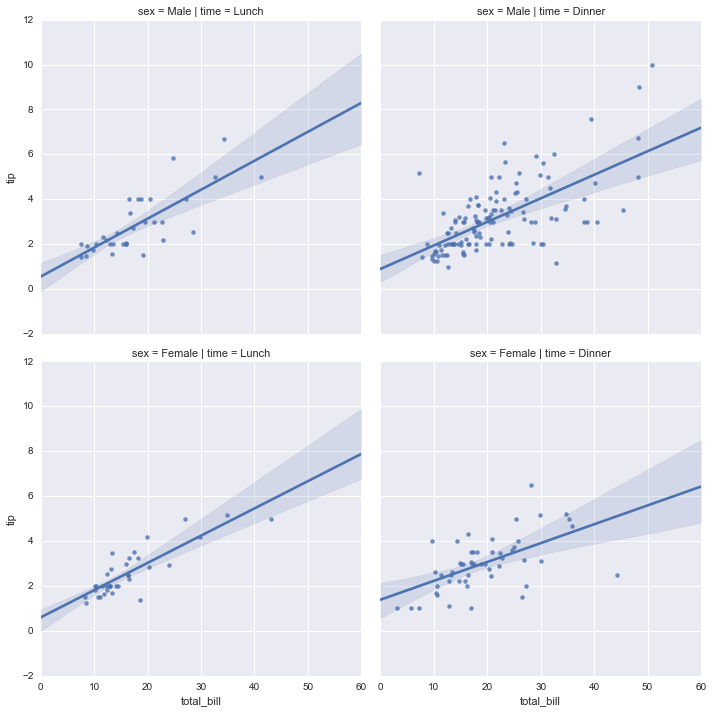

In [30]:
sns.lmplot(x="total_bill", y="tip", row="sex", col="time",data=tips)

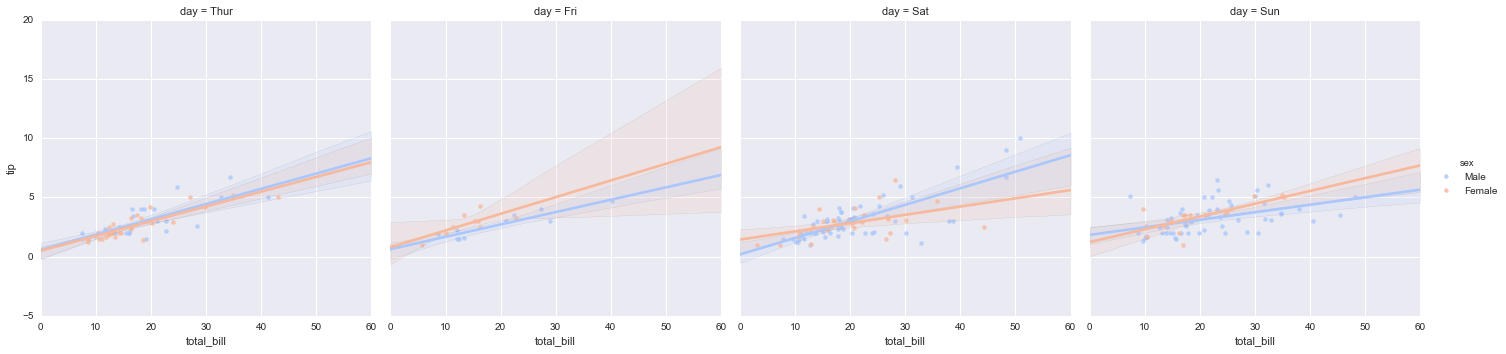

In [24]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm')

## Aspect and Size

Seaborn figures can have their size and aspect ratio adjusted with the **size** and **aspect** parameters:

C:\Users\Saad\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


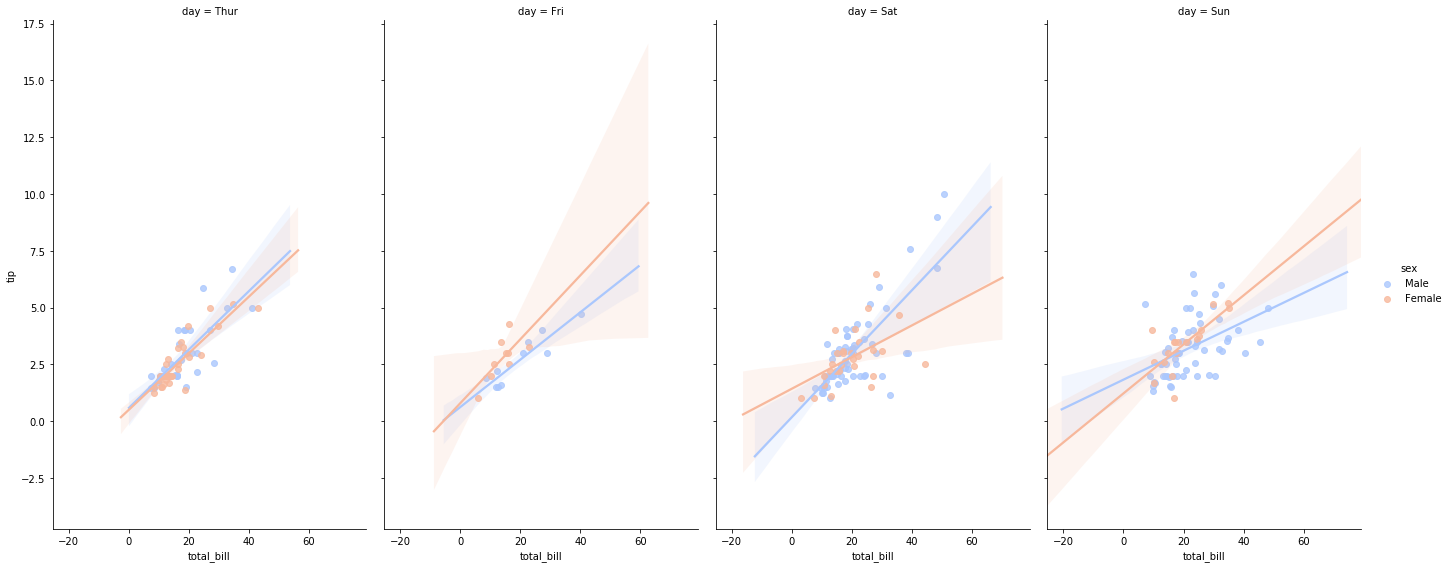

In [296]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm',
          aspect=0.6,size=8)

# Style and Color

We've shown a few times how to control figure aesthetics in seaborn, but let's now go over it formally:

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
tips = sns.load_dataset('tips')

## Styles

You can set particular styles:

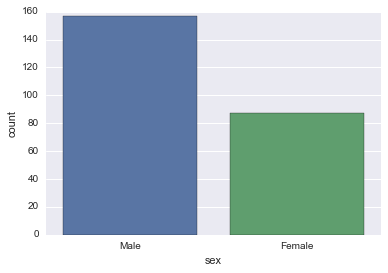

In [2]:
sns.countplot(x='sex',data=tips)

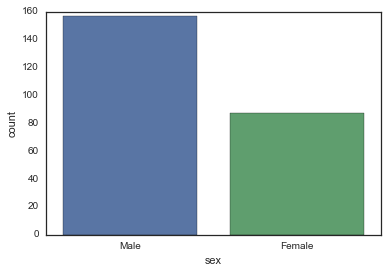

In [3]:
sns.set_style('white')
sns.countplot(x='sex',data=tips)

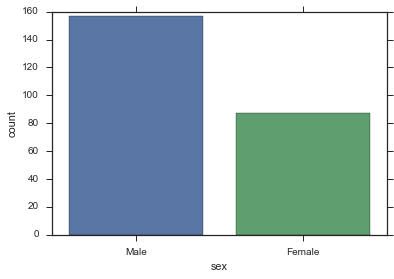

In [4]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips,palette='deep')

## Spine Removal

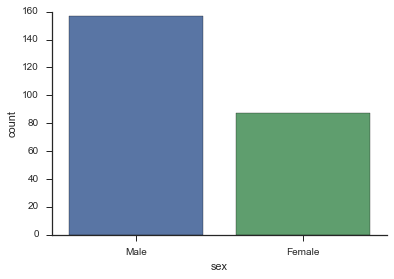

In [5]:
sns.countplot(x='sex',data=tips)
sns.despine()

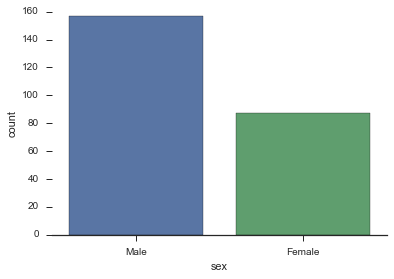

In [6]:
sns.countplot(x='sex',data=tips)
sns.despine(left=True)

## Size and Aspect

You can use matplotlib's **plt.figure(figsize=(width,height) ** to change the size of most seaborn plots.

You can control the size and aspect ratio of most seaborn grid plots by passing in parameters: size, and aspect. For example:

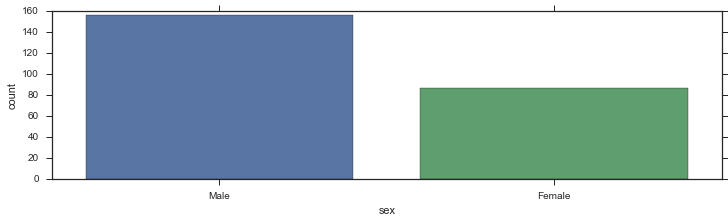

In [11]:
# Non Grid Plot
plt.figure(figsize=(12,3))
sns.countplot(x='sex',data=tips)

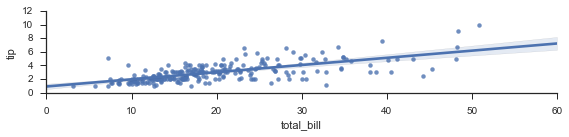

In [13]:
# Grid Type Plot
sns.lmplot(x='total_bill',y='tip',size=2,aspect=4,data=tips)

## Scale and Context

The set_context() allows you to override default parameters:

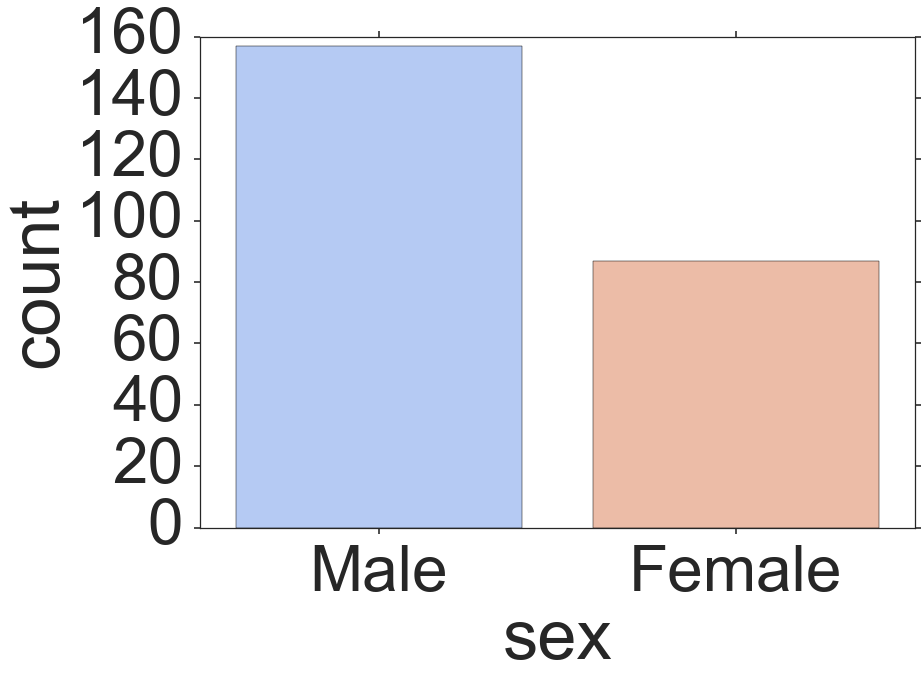

In [17]:
sns.set_context('poster',font_scale=4)
sns.countplot(x='gender',data=tips,palette='coolwarm')